<a href="https://colab.research.google.com/github/Singhsansar/Covid-Knowledge-Graph/blob/main/Knowledge_graph/knowledge_graph_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup Graph**

In [ ]:
!pip install neo4j
!pip install py2neo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.16.0-py3-none-any.whl size=273811 sha256=d6bb426c965617ae95401afc2d04e3582368d417e0c351f015dbf1e7a823939d
  Stored in directory: /root/.cache/pip/wheels/20/a0/f6/87a1ec9636c915fe2d6c6e859fd55a6231dd9bc95a1d5394b1
Successfully built neo4j
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
from neo4j import GraphDatabase
uri = "bolt://3.231.19.55:7687"
username = "neo4j"
password = "hearts-wire-swaps"
driver = GraphDatabase.driver(uri, auth=(username, password))

## **Inserting in to Knowledge Graph database**

In [ ]:
# def insert_into_graph_database(source,target,label):
#     create_node_query = "CREATE (n:Node {id: $id, label: $label})"

#     create_relationship_query = "MATCH (source:Node {id: $source_id}), (target:Node {id: $target_id}) " \
#                                  "CREATE (source)-[:RELATIONSHIP {label: $label}]->(target)"


#     try:
#         with driver.session() as session:
#             session.run(create_node_query, id=source, label=label)
#             session.run(create_node_query, id=target, label=label)
#             session.run(create_relationship_query, source_id=source, target_id=target, label=label)

#         print("Nodes and relationship inserted successfully.")
#     except Exception as e:
#         print(f"Error during insertion: {e}")

In [ ]:
def insert_into_graph_database(source, target, label):
    create_node_query = "CREATE (n:Node {id: $id, label: $label})"

    create_relationship_query = (
        "MATCH (source:Node {id: $source_id}), (target:Node {id: $target_id}) "
        "CREATE (source)-[:RELATIONSHIP {label: $label, weight: 1}]->(target)"
    )

    try:
        with driver.session() as session:
            session.run(create_node_query, id=source, label=label)
            session.run(create_node_query, id=target, label=label)
            session.run(create_relationship_query, source_id=source, target_id=target, label=label)

        print("Nodes and relationship inserted successfully.")
    except Exception as e:
        print(f"Error during insertion: {e}")


In [72]:
import json
with open('output.json', 'r') as file:
    data = json.load(file)

i = 0
for relationship in data["relationships"]:
    source = relationship['source']
    label = relationship['relationship']
    target = relationship['target']
    insert_into_graph_database(source,target,label)


<ipython-input-60-296a80eaf417>:10: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.
Nodes and relationship inserted successfully.


# **Performing Named entity recognisation and inserting it to the Graph DataBase**

# **Loading Graph and Visualizing**

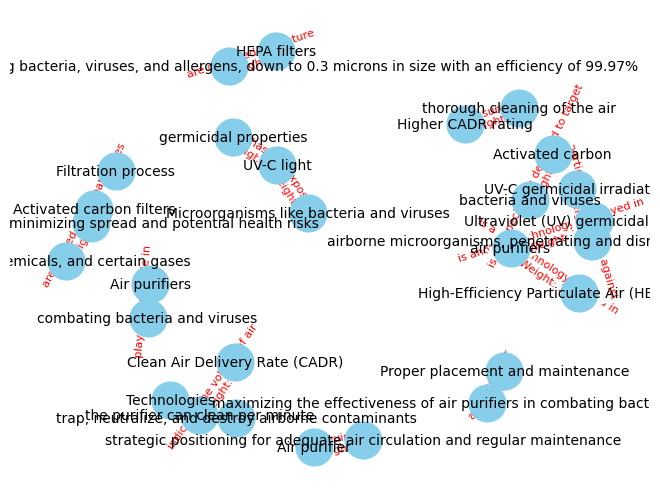

In [73]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import networkx as nx
from py2neo import Graph

uri = "bolt://3.231.19.55:7687"
username = "neo4j"
password = "hearts-wire-swaps"
driver = GraphDatabase.driver(uri, auth=(username, password))

def retrieve_graph_data():
    graph = nx.Graph()
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session(database="neo4j") as session:
        result = session.run("MATCH (n)-[r]->(m) RETURN n, r, m")
        for record in result:
            source = record["n"]
            target = record["m"]
            relation = record["r"]

            graph.add_node(source["id"], label=source["label"])
            graph.add_node(target["id"], label=target["label"])
            graph.add_edge(source["id"], target["id"], relation=relation["label"], weight=relation["weight"])
    return graph

def visualize_graph(graph, edge_length=1.0):
    pos = nx.spring_layout(graph, k=edge_length)
    labels = {(i, j): f"{graph[i][j]['relation']}\nWeight: {graph[i][j]['weight']}" for i, j in graph.edges()}
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_color='red', font_size=8)
    plt.show()

graph_data = retrieve_graph_data()
visualize_graph(graph_data, edge_length=0.5)
driver.close()


## **Deleting the knowledge Graph**

In [ ]:

from neo4j import GraphDatabase


uri = "bolt://3.231.19.55:7687"
username = "neo4j"
password = "hearts-wire-swaps"
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to delete nodes and relationships
def delete_nodes_and_relationships():
    with driver.session() as session:
          session.run("MATCH (n) DETACH DELETE n")

# Call the function to delete everything
delete_nodes_and_relationships()
driver.close()

In [74]:
from py2neo import Graph

uri = "bolt://3.231.19.55:7687"
username = "neo4j"
password = "hearts-wire-swaps"

graph = Graph(uri, auth=(username, password))

cypher_query = """
MATCH (source:Node)-[relation:RELATIONSHIP]->(target:Node)
RETURN source.id AS source_id, source.label AS source_label,
       relation.label AS relationship_label, relation.weight AS relationship_weight,
       target.id AS target_id, target.label AS target_label
"""

result = graph.run(cypher_query)

for record in result:
    print(f"Source Node: {record['source_id']} ({record['source_label']})")
    print(f"Relationship: {record['relationship_label']} (Weight: {record['relationship_weight']})")
    print(f"Target Node: {record['target_id']} ({record['target_label']})")
    print("-" * 40)




Source Node: Activated carbon (is not specifically designed to target)
Relationship: is not specifically designed to target (Weight: 1)
Target Node: bacteria and viruses (is not specifically designed to target)
----------------------------------------
Source Node: Clean Air Delivery Rate (CADR) (indicates the volume of air)
Relationship: indicates the volume of air (Weight: 1)
Target Node: the purifier can clean per minute (indicates the volume of air)
----------------------------------------
Source Node: Higher CADR rating (ensures)
Relationship: ensures (Weight: 1)
Target Node: thorough cleaning of the air (ensures)
----------------------------------------
Source Node: Proper placement and maintenance (are crucial for)
Relationship: are crucial for (Weight: 1)
Target Node: maximizing the effectiveness of air purifiers in combating bacteria and viruses (are crucial for)
----------------------------------------
Source Node: Air purifier (requires)
Relationship: requires (Weight: 1)
Tar